In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Загрузка данных

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
macro = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ДЗ. Большое 3/macro.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ДЗ. Большое 3/sample_submission.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ДЗ. Большое 3/test.csv')
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ДЗ. Большое 3/train.csv')

In [4]:
macro

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,brent,net_capital_export,gdp_annual,gdp_annual_growth,average_provision_of_build_contract,average_provision_of_build_contract_moscow,rts,micex,micex_rgbi_tr,micex_cbi_tr,deposits_value,deposits_growth,deposits_rate,mortgage_value,mortgage_growth,mortgage_rate,grp,grp_growth,income_per_cap,real_dispos_income_per_cap_growth,salary,salary_growth,fixed_basket,retail_trade_turnover,retail_trade_turnover_per_cap,retail_trade_turnover_growth,labor_force,unemployment,employment,...,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,infant_mortarity_per_1000_cap,perinatal_mort_per_1000_cap,incidence_population,rent_price_4+room_bus,rent_price_3room_bus,rent_price_2room_bus,rent_price_1room_bus,rent_price_3room_eco,rent_price_2room_eco,rent_price_1room_eco,load_of_teachers_preschool_per_teacher,child_on_acc_pre_school,load_of_teachers_school_per_teacher,students_state_oneshift,modern_education_share,old_education_build_share,provision_doctors,provision_nurse,load_on_doctors,power_clinics,hospital_beds_available_per_cap,hospital_bed_occupancy_per_year,provision_retail_space_sqm,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,NaN,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,175.15,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,178.66,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9050,43.4054,80.12,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8360,42.9600,80.59,NaN,38807.2,-0.078209,5.0,NaN,NaN,NaN,NaN,183.44,7484970,NaN,NaN,142968,NaN,13.72,8375.8638,NaN,30789.2,0.038,38410.5,NaN,11443.63,2882.4169,251.484,106.8,6436.244,0.018,0.69,...,99.6,44.4,95.7,55.0,99.9,0.3,74.2,6.1,5.87,696.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,721.477765,"45,713",1356.112607,NaN,NaN,NaN,18.0,99.4,7872.848285,162.9,NaN,NaN,NaN,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [5]:
# macro.info()

In [6]:
# macro.describe()

In [7]:
# macro.describe(include=['object', 'bool'])

In [8]:
#!pip3 install pandas-profiling==3.1.

In [9]:
#from pandas_profiling import ProfileReport

In [10]:
# ProfileReport(macro,explorative=False, minimal=True, dark_mode = True)

In [11]:
sample_submission

,id,price_doc
0,30474,7118500.41
1,30475,7118500.41
2,30476,7118500.41
3,30477,7118500.41
4,30478,7118500.41
...,...,...
7657,38131,7118500.41
7658,38132,7118500.41
7659,38133,7118500.41
7660,38134,7118500.41


In [12]:
test

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,2015-07-01,39.00,20.7,2,9,1,1998.0,1,8.9,3.0,Investment,Juzhnoe Butovo,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,NaN,1,0,13,4,no,0,4,4,no,no,no,no,no,no,no,...,12,781.82,1227.27,1004.55,1,2,2,7,0,0,0,1,3,1,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1
1,30475,2015-07-01,79.20,NaN,8,17,1,0.0,3,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,...,10,680.00,1200.00,940.00,0,1,6,2,1,0,0,1,5,0,0,7,0,39.10,7.70,2,177300,6,231300,20,733.33,1250.00,991.67,2,4,8,4,1,1,0,2,11,0,1,12,1
2,30476,2015-07-01,40.50,25.1,3,5,2,1960.0,2,4.8,2.0,Investment,Perovo,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,no,0,2,7,yes,no,yes,yes,no,no,no,...,37,608.33,1069.44,838.89,1,8,19,7,2,0,0,2,3,0,5,22,4,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11
3,30477,2015-07-01,62.80,36.0,17,17,1,2016.0,2,62.8,3.0,OwnerOccupier,Poselenie Voskresenskoe,2.149409e+07,7122,0.262459,0.017647,489,NaN,0,469,NaN,0,0,NaN,0,0,0,2,no,0,0,0,no,no,no,no,no,no,no,...,1,300.00,500.00,400.00,0,1,0,0,0,0,0,0,4,0,0,0,0,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0
4,30478,2015-07-01,40.00,40.0,17,17,1,0.0,1,1.0,1.0,OwnerOccupier,Poselenie Vnukovskoe,2.553630e+07,4001,0.496315,0.007122,275,NaN,0,264,NaN,0,0,NaN,0,0,0,0,no,0,1,0,no,no,no,no,no,no,no,...,9,700.00,1222.22,961.11,0,1,5,2,1,0,0,1,4,0,0,6,0,35.62,6.96,1,117300,4,201300,20,747.37,1263.16,1005.26,1,4,8,5,1,1,0,2,12,0,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,2016-05-26,52.20,31.8,10,12,5,1973.0,2,9.1,2.0,Investment,Kon'kovo,7.811375e+06,153248,0.127002,0.135650,7517,2627.0,5,7960,9650.0,5,0,350.0,3,0,11,3,no,0,11,6,no,no,no,yes,no,no,no,...,91,698.86,1181.82,940.34,3,20,35,25,7,1,0,2,15,1,1,20,4,30.34,4.66,44,1742694,52,1485126,307,696.58,1167.81,932.19,15,83,98,81,28,1,1,8,39,2,3,75,12
7658,38132,2016-05-28,54.09,NaN,14,0,1,NaN,2,0.0,NaN,OwnerOccupier,Poselenie Desjonovskoe,5.299528e+07,13890,0.349935,0.011654,953,NaN,0,9

In [13]:
train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25,culture_objects_top_25_raion,shopping_centers_raion,office_raion,thermal_power_plant_raion,incineration_raion,oil_chemistry_raion,radiation_raion,railroad_terminal_raion,big_market_raion,nuclear_reactor_raion,...,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Bibirevo,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,no,0,16,1,no,no,no,no,no,no,no,...,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Nagatinskij Zaton,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,yes,1,3,0,no,no,no,no,no,no,no,...,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Tekstil'shhiki,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,no,0,0,1,no,no,no,yes,no,no,no,...,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Mitino,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,NaN,1,0,17,6,no,0,11,4,no,no,no,no,no,no,no,...,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,Investment,Basmannoe,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,no,0,10,93,no,no,no,yes,yes,no,no,...,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,Investment,Otradnoe,1.005305e+07,175518,0.096270,0.300323,9753,5088.0,4,10311,12721.0,4,0,NaN,1,0,10,3,no,0,9,6,no,yes,no,yes,no,no,no,...,647.89,1112.68,880.28,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,17.24,44,838601,53,2548292,207,689.95,1156.08,923.02,18,63,59,47,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB


# EDA

Отсортируем числовые признаки из тренировочного и тестового DF

In [15]:
train_num_cols = []
for i in train.columns:
  if (train[i].dtype == "int64") or (train[i].dtype == "float64"):
    train_num_cols.append(i)

test_num_cols = []
for i in test.columns:
  if (test[i].dtype == "int64") or (test[i].dtype == "float64"):
    test_num_cols.append(i)

In [16]:
train[train_num_cols].fillna(0).drop(['price_doc'], axis=1)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,1,43,27.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,6.407578e+06,155572,0.189727,0.000070,9576,5001.0,5,10309,11065.0,5,0,240.0,1,0,7,3,0,16,1,86206,40477,45729,21154,11007,10147,98207,52277,45930,36211,10580,...,68,639.68,1079.37,859.52,5,21,22,16,3,1,0,2,4,0,0,21,1,13.09,13.31,29,807385,52,4036616,152,708.57,1185.71,947.14,12,39,48,40,9,4,0,13,22,1,0,52,4
1,2,34,19.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,9.589337e+06,115352,0.372602,0.049637,6880,3119.0,5,7759,6237.0,8,0,229.0,1,0,6,1,1,3,0,76284,34200,42084,15727,7925,7802,70194,35622,34572,29431,9266,...,30,631.03,1086.21,858.62,1,11,11,4,2,1,0,1,7,0,6,19,1,10.26,27.47,66,2690465,40,2034942,177,673.81,1148.81,911.31,9,49,65,36,15,3,0,15,29,1,10,66,14
2,3,43,29.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.808270e+06,101708,0.112560,0.118537,5879,1463.0,4,6207,5580.0,7,0,1183.0,1,0,5,1,0,0,1,101982,46076,55906,13028,6835,6193,63388,31813,31575,25292,7609,...,41,697.44,1192.31,944.87,2,9,17,9,3,1,0,0,11,0,0,20,6,13.69,21.58,43,1478160,35,1572990,122,702.68,1196.43,949.55,10,29,45,25,10,3,0,11,27,0,4,67,10
3,4,89,50.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.258354e+07,178473,0.194703,0.069753,13087,6839.0,9,13670,17063.0,10,0,0.0,1,0,17,6,0,11,4,21155,9828,11327,28563,14680,13883,120381,60040,60341,29529,9083,...,32,718.75,1218.75,968.75,0,5,14,10,3,0,0,1,2,0,0,18,3,14.18,3.89,8,244166,22,942180,61,931.58,1552.63,1242.11,4,7,21,15,11,2,1,4,4,0,0,26,3
4,5,77,77.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,8.398461e+06,108171,0.015234,0.037316,5706,3240.0,7,6748,7770.0,9,0,562.0,4,2,25,2,0,10,93,28179,13522,14657,13368,7159,6209,68043,34236,33807,26760,8563,...,1068,853.03,1410.45,1131.74,63,266,267,262,149,57,4,70,121,1,40,77,5,8.38,10.92,689,8404624,114,3503058,2283,853.88,1411.45,1132.66,143,566,578,552,319,108,17,135,236,2,91,195,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,1.005305e+07,175518,0.096270,0.300323,9753,5088.0,4,10311,12721.0,4,0,0.0,1,0,10,3,0,9,6,61396,27916,33480,21400,11094,10306,112133,59089,53044,41985,12703,...,79,647.89,1112.68,880.28,8,20,30,15,5,1,0,5,12,1,0,29,3,15.52,17.24,44,838601,53,2548292,207,689.95,1156.08,923.02,18,63,59,47,15,5,0,15,26,1,2,84,6
30467,30470,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,75377,0.065444,0.000078,4237

In [17]:
test[test_num_cols].fillna(0)

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,39.00,20.7,2,9,1,1998.0,1,8.9,3.0,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,0.0,1,0,13,4,0,4,4,102618,47681,54937,30808,16251,14557,121369,59138,62231,26087,7410,...,12,781.82,1227.27,1004.55,1,2,2,7,0,0,0,1,3,1,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1
1,30475,79.20,0.0,8,17,1,0.0,3,1.0,1.0,2.553630e+07,4001,0.496315,0.007122,275,0.0,0,264,0.0,0,0,0.0,0,0,0,0,0,1,0,17790,8350,9443,574,297,277,2566,1356,1211,861,244,...,10,680.00,1200.00,940.00,0,1,6,2,1,0,0,1,5,0,0,7,0,39.10,7.70,2,177300,6,231300,20,733.33,1250.00,991.67,2,4,8,4,1,1,0,2,11,0,1,12,1
2,30476,40.50,25.1,3,5,2,1960.0,2,4.8,2.0,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,0,2,7,36154,16222,19932,13799,6937,6862,91795,44734,47061,33728,9653,...,37,608.33,1069.44,838.89,1,8,19,7,2,0,0,2,3,0,5,22,4,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11
3,30477,62.80,36.0,17,17,1,2016.0,2,62.8,3.0,2.149409e+07,7122,0.262459,0.017647,489,0.0,0,469,0.0,0,0,0.0,0,0,0,2,0,0,0,9553,4529,5024,1021,529,493,4568,2414,2155,1533,435,...,1,300.00,500.00,400.00,0,1,0,0,0,0,0,0,4,0,0,0,0,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0
4,30478,40.00,40.0,17,17,1,0.0,1,1.0,1.0,2.553630e+07,4001,0.496315,0.007122,275,0.0,0,264,0.0,0,0,0.0,0,0,0,0,0,1,0,17790,8350,9443,574,297,277,2566,1356,1211,861,244,...,9,700.00,1222.22,961.11,0,1,5,2,1,0,0,1,4,0,0,6,0,35.62,6.96,1,117300,4,201300,20,747.37,1263.16,1005.26,1,4,8,5,1,1,0,2,12,0,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,52.20,31.8,10,12,5,1973.0,2,9.1,2.0,7.811375e+06,153248,0.127002,0.135650,7517,2627.0,5,7960,9650.0,5,0,350.0,3,0,11,3,0,11,6,123000,58226,64774,16468,8851,7617,100062,55456,44606,36718,11958,...,91,698.86,1181.82,940.34,3,20,35,25,7,1,0,2,15,1,1,20,4,30.34,4.66,44,1742694,52,1485126,307,696.58,1167.81,932.19,15,83,98,81,28,1,1,8,39,2,3,75,12
7658,38132,54.09,0.0,14,0,1,0.0,2,0.0,0.0,5.299528e+07,13890,0.349935,0.011654,953,0.0,0,915,0.0,0,0,0.0,0,0,0,1,0,0,0,21819,10343,11477,1991,1030,962,8910,4707,4203,2989,847,...,2,750.00,1250.00,1000.00,0,0,1,1,0,0,0,0,3,0,0,0,0,39.40,1.32,0,0,0,0,7,1114.29,185

# Разбиение на выборки

В качестве первого варианта используем минимально очищенные данные. Исключим из выборок категориальные признаки, пропущенные значения заполним нулями. Разобьем тренировочную выборку на две части: тренировочную и валидационную. 

In [18]:
from sklearn.model_selection import train_test_split

In [48]:
X_train_0 = np.asarray(train[train_num_cols].fillna(0).drop(['price_doc'], axis=1))
y_train_0 = train['price_doc']

X_train, X_val, y_train, y_val = train_test_split(X_train_0, y_train_0, test_size=0.2, random_state=1)

X_test = test[test_num_cols].fillna(0)

In [20]:
def val_table(num_samp): 
  return pd.DataFrame(data= {'id':X_val[:,:1].ravel(), 'Val': y_val}).set_index('id').sort_values(by=['id']).head(num_samp)

In [21]:
def predict_table(metod, num_samp):
  return pd.DataFrame(data= {'id':X_val[:,:1].ravel(), 'Predict': metod.predict(X_val)}).set_index('id').sort_values(by=['id']).head(num_samp)

# 1) Решающее дерево

In [22]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import normalize
import pickle

In [23]:
# Крос-валидация и подбор гиперпараметров

# %%time

# dtree = DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=1)
# dtree_params = {'max_depth': range(5,20,5)}
# dtree_grid = GridSearchCV(dtree, dtree_params, cv=5, n_jobs=-1,verbose=True)
# dtree_grid.fit(X_train, y_train)

# save_dtree_grid = pickle.dumps(dtree_grid)

# print(
#     '''
#     - Лучшие гиперпараметры: {}
#     - Cреднеквадратичная ошибка на тестовой выборке: {}
#     - Cреднеквадратичная ошибка на валидационной выборке: {}
#     '''.format(
#         dtree_grid.best_params_,
#         dtree_grid.best_score_,
#         dtree_grid.score(X_val, y_val)
#         )
# )

# load_dtree_grid = pickle.loads(save_dtree_grid)
# load_dtree_grid.predict(X_val)

In [24]:
dtree = DecisionTreeRegressor(criterion='squared_error', splitter='best', random_state=1, max_depth = 18)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=18, random_state=1)

In [25]:
print(
    '''
    - Точность на тестовой выборке: {}
    - Точность на валидационной выборке: {}
    '''.format(
        dtree.score(X_train, y_train),
        dtree.score(X_val, y_val)
        )
)


    - Точность на тестовой выборке: 0.9694642691038021
    - Точность на валидационной выборке: 0.4866476146535753
    


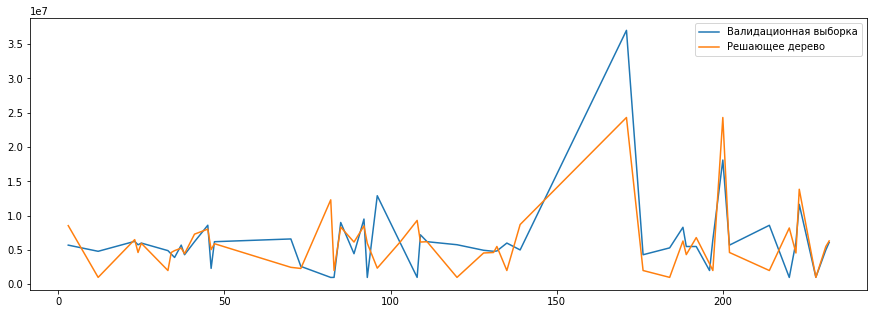

In [26]:
plt.figure(figsize=(15, 5))
num_samp = 50
plt.plot(val_table(num_samp).index, val_table(num_samp).Val,  label='Валидационная выборка')
plt.plot(predict_table(dtree, num_samp).index, predict_table(dtree, num_samp).Predict,  label='Решающее дерево')
plt.legend()

# 2) Линейная регрессия

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [28]:
%%time

linr = LinearRegression().fit(X_train, y_train)

CPU times: user 989 ms, sys: 117 ms, total: 1.11 s
Wall time: 727 ms


In [29]:
# посчитаем значения для валидационной выборки
linr.predict(X_val)

array([6558381.61760655, 7823032.44049224, 6706658.18386954, ...,
       9137189.74704646, 6421104.22129897, 5268181.9427443 ])

In [30]:
print(
    '''
    - Точность на тестовой выборке: {}
    - Точность на валидационной выборке: {}
    '''.format(
        linr.score(X_train, y_train),
        linr.score(X_val, y_val)
        )
)


    - Точность на тестовой выборке: 0.4146969995954656
    - Точность на валидационной выборке: 0.45710809301433186
    


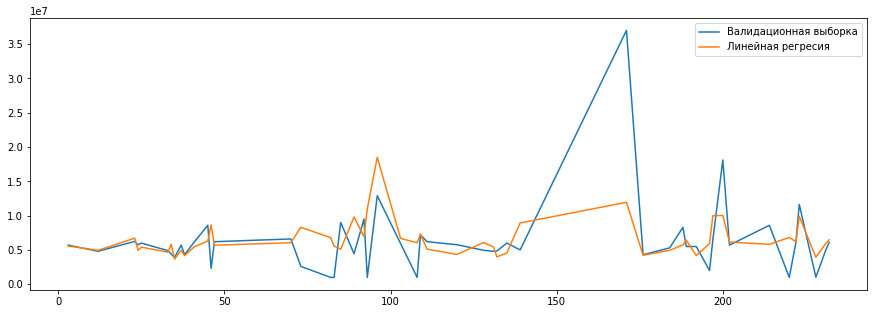

In [31]:
plt.figure(figsize=(15, 5))
num_samp = 50
plt.plot(val_table(num_samp).index, val_table(num_samp).Val,  label='Валидационная выборка')
plt.plot(predict_table(linr, num_samp).index, predict_table(linr, num_samp).Predict,  label='Линейная регресия')
plt.legend()

# 3) Случайный лес

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
# Крос-валидация и подбор гиперпараметров

# %%time

# rf = RandomForestRegressor(n_estimators=10,criterion='squared_error', random_state=1)
# rf_params = {'n_estimators': range(100,500,100), 'max_depth': range(5,20,5)}
# rf_grid = GridSearchCV(dtree, dtree_params, cv=5, n_jobs=-1,verbose=True)
# rf_grid.fit(X_train, y_train)

# save_rf_grid = pickle.dumps(rf_grid)

# print(
#     '''
#     - Лучшие гиперпараметры: {}
#     - Cреднеквадратичная ошибка: {}
#     '''.format(
#         rf_grid.best_params_,
#         rf_grid.best_score_)
# )

In [53]:
rf = RandomForestRegressor(n_estimators=15,criterion='squared_error', random_state=1, max_depth = 10)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=15, random_state=1)

In [54]:
print(
    '''
    - Точность на тестовой выборке: {}
    - Точность на валидационной выборке: {}
    '''.format(
        rf.score(X_train, y_train),
        rf.score(X_val, y_val)
        )
)


    - Точность на тестовой выборке: 0.8230796343415732
    - Точность на валидационной выборке: 0.7102364261553648
    


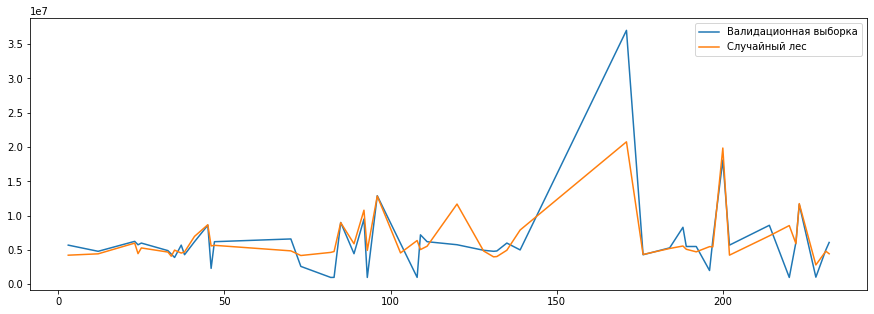

In [36]:
plt.figure(figsize=(15, 5))
num_samp = 50
plt.plot(val_table(num_samp).index, val_table(num_samp).Val,  label='Валидационная выборка')
plt.plot(predict_table(rf, num_samp).index, predict_table(rf, num_samp).Predict,  label='Случайный лес')
plt.legend()

# 4) Градиентный бустинг

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
# Крос-валидация и подбор гиперпараметров

# %%time

# GB = GradientBoostingRegressor(loss='squared_error',random_state=1)
# GB_params = {'n_estimators': 10,'max_depth': 3}
# GB_grid = GridSearchCV(GB, GB_params, cv=5, n_jobs=-1)
# GB_grid.fit(X_train, y_train)

# save_GB = pickle.dumps(GB_grid)

# print(
#     '''
#     - Лучшие гиперпараметры: {}
#     - Cреднеквадратичная ошибка: {}
#     '''.format(
#         GB_grid.best_params_,
#         GB_grid.best_score_)
# )

In [39]:
GB = GradientBoostingRegressor(loss='squared_error',random_state=1, n_estimators=500, max_depth=5)
GB.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=500, random_state=1)

In [40]:
print(
    '''
    - Точность на тестовой выборке: {}
    - Точность на валидационной выборке: {}
    '''.format(
        GB.score(X_train, y_train),
        GB.score(X_val, y_val)
        )
)


    - Точность на тестовой выборке: 0.9104182994561703
    - Точность на валидационной выборке: 0.7374153383296855
    


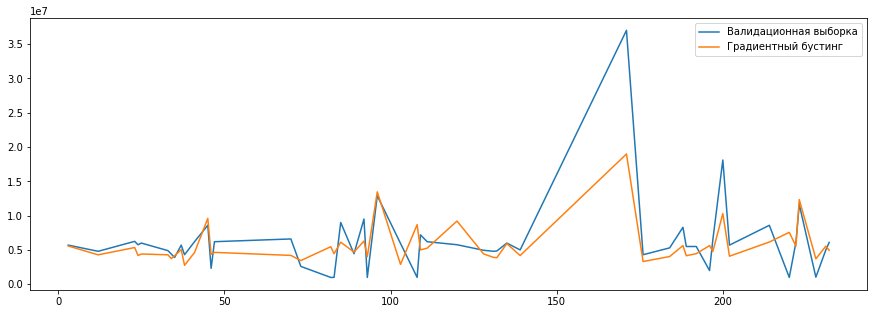

In [41]:
plt.figure(figsize=(15, 5))
num_samp = 50
plt.plot(val_table(num_samp).index, val_table(num_samp).Val,  label='Валидационная выборка')
plt.plot(predict_table(GB, num_samp).index, predict_table(GB, num_samp).Predict,  label='Градиентный бустинг')
plt.legend()

# Визуализация решений 

In [42]:
# pd.DataFrame(data= {'DecisionTree': dtree_grid.best_score_,\
#                     'LinearRegression': linr.score(X_train, y_train),\
#                     'RandomForest': rf_grid.best_score_,\
#                     'GradientBoosting': GB.score(X_train, y_train)})

Визуализируем предсказания, полученные разными альгоритмами и сравним их с валидационной выборкой.

In [43]:
# plt.figure(figsize=(20, 10))
# num_samp = 50
# plt.plot(val_table(num_samp).index, val_table(num_samp).Val,  label='Валидационная выборка')
# plt.plot(predict_table(dtree_grid, num_samp).index, predict_table(dtree_grid, num_samp).Predict,  label='Решающее дерево')
# plt.plot(predict_table(rf_grid, num_samp).index, predict_table(rf_grid, num_samp).Predict,  label='Случайный лес')
# plt.plot(predict_table(linr, num_samp).index, predict_table(linr, num_samp).Predict,  label='Линейная регресия')
# plt.plot(predict_table(GB, num_samp).index, predict_table(GB, num_samp).Predict,  label='Градиентный бустинг')
# plt.legend()

In [60]:
GB_Price = GB.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [57]:
rf_Price = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [45]:
from pathlib import Path  

In [59]:
X_test

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,hospital_beds_raion,healthcare_centers_raion,university_top_20_raion,sport_objects_raion,additional_education_raion,culture_objects_top_25_raion,shopping_centers_raion,office_raion,full_all,male_f,female_f,young_all,young_male,young_female,work_all,work_male,work_female,ekder_all,ekder_male,...,cafe_count_3000,cafe_sum_3000_min_price_avg,cafe_sum_3000_max_price_avg,cafe_avg_price_3000,cafe_count_3000_na_price,cafe_count_3000_price_500,cafe_count_3000_price_1000,cafe_count_3000_price_1500,cafe_count_3000_price_2500,cafe_count_3000_price_4000,cafe_count_3000_price_high,big_church_count_3000,church_count_3000,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,green_part_5000,prom_part_5000,office_count_5000,office_sqm_5000,trc_count_5000,trc_sqm_5000,cafe_count_5000,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg,cafe_avg_price_5000,cafe_count_5000_na_price,cafe_count_5000_price_500,cafe_count_5000_price_1000,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,30474,39.00,20.7,2,9,1,1998.0,1,8.9,3.0,2.615514e+07,178264,0.137846,0.041116,14080,11926.0,11,14892,24750.0,13,1,0.0,1,0,13,4,0,4,4,102618,47681,54937,30808,16251,14557,121369,59138,62231,26087,7410,...,12,781.82,1227.27,1004.55,1,2,2,7,0,0,0,1,3,1,0,7,0,21.58,4.69,1,37550,8,299166,19,676.47,1088.24,882.35,2,5,4,8,0,0,0,1,10,1,0,14,1
1,30475,79.20,0.0,8,17,1,0.0,3,1.0,1.0,2.553630e+07,4001,0.496315,0.007122,275,0.0,0,264,0.0,0,0,0.0,0,0,0,0,0,1,0,17790,8350,9443,574,297,277,2566,1356,1211,861,244,...,10,680.00,1200.00,940.00,0,1,6,2,1,0,0,1,5,0,0,7,0,39.10,7.70,2,177300,6,231300,20,733.33,1250.00,991.67,2,4,8,4,1,1,0,2,11,0,1,12,1
2,30476,40.50,25.1,3,5,2,1960.0,2,4.8,2.0,9.946335e+06,139322,0.065409,0.225825,6400,2232.0,7,6558,7966.0,7,0,1548.0,3,0,13,0,0,2,7,36154,16222,19932,13799,6937,6862,91795,44734,47061,33728,9653,...,37,608.33,1069.44,838.89,1,8,19,7,2,0,0,2,3,0,5,22,4,25.62,13.59,27,427889,26,1024431,179,668.97,1132.18,900.57,5,53,64,42,11,4,0,10,21,0,10,71,11
3,30477,62.80,36.0,17,17,1,2016.0,2,62.8,3.0,2.149409e+07,7122,0.262459,0.017647,489,0.0,0,469,0.0,0,0,0.0,0,0,0,2,0,0,0,9553,4529,5024,1021,529,493,4568,2414,2155,1533,435,...,1,300.00,500.00,400.00,0,1,0,0,0,0,0,0,4,0,0,0,0,24.25,1.66,0,0,0,0,5,1560.00,2500.00,2030.00,0,1,0,1,1,2,0,0,10,0,0,2,0
4,30478,40.00,40.0,17,17,1,0.0,1,1.0,1.0,2.553630e+07,4001,0.496315,0.007122,275,0.0,0,264,0.0,0,0,0.0,0,0,0,0,0,1,0,17790,8350,9443,574,297,277,2566,1356,1211,861,244,...,9,700.00,1222.22,961.11,0,1,5,2,1,0,0,1,4,0,0,6,0,35.62,6.96,1,117300,4,201300,20,747.37,1263.16,1005.26,1,4,8,5,1,1,0,2,12,0,1,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,38131,52.20,31.8,10,12,5,1973.0,2,9.1,2.0,7.811375e+06,153248,0.127002,0.135650,7517,2627.0,5,7960,9650.0,5,0,350.0,3,0,11,3,0,11,6,123000,58226,64774,16468,8851,7617,100062,55456,44606,36718,11958,...,91,698.86,1181.82,940.34,3,20,35,25,7,1,0,2,15,1,1,20,4,30.34,4.66,44,1742694,52,1485126,307,696.58,1167.81,932.19,15,83,98,81,28,1,1,8,39,2,3,75,12
7658,38132,54.09,0.0,14,0,1,0.0,2,0.0,0.0,5.299528e+07,13890,0.349935,0.011654,953,0.0,0,915,0.0,0,0,0.0,0,0,0,1,0,0,0,21819,10343,11477,1991,1030,962,8910,4707,4203,2989,847,...,2,750.00,1250.00,1000.00,0,0,1,1,0,0,0,0,3,0,0,0,0,39.40,1.32,0,0,0,0,7,1114.29,185

In [50]:
GB_out = pd.DataFrame({'id':X_test.id, 'price_doc':GB_Price}).set_index(['id'])

In [61]:
rf_out = pd.DataFrame({'id':X_test.id, 'price_doc':rf_Price}).set_index(['id'])

In [62]:
GB_filepath = Path('/content/drive/MyDrive/Colab Notebooks/ДЗ. Большое 3/GB_out_0.csv') 
rf_filepath = Path('/content/drive/MyDrive/Colab Notebooks/ДЗ. Большое 3/rf_out_0.csv') 

In [52]:
GB_out.to_csv(GB_filepath)  

In [63]:
rf_out.to_csv(rf_filepath)  